Name: Sharmin

Labpartner(s)

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np

# Class 6.1

Today we will start with fiunction sharing and do more matplotlib.

# Warmups 6.1

**W.1** Write a function that loops through a list of numbers and checks if they are odd or even, then returns a new list of "odd" or "even" for each element in the input list. For example:

Given the list [3,8,7] the function would return
["odd", "even", "odd"]

In [2]:
def odd_or_even(numbers):
    result = []
    for num in numbers:
        if num % 2 == 0:
            result.append("even")
        else:
            result.append("odd")
    return result

# Example usage
input_list = [3, 8, 7]
output_list = odd_or_even(input_list)
print(output_list)  # Output: ['odd', 'even', 'odd']

['odd', 'even', 'odd']


# Lecture 6.1

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - first 5 people today, the rest on Thursday

### Questions

### Loading and plotting netcdf files using xarray

Most modeling data output is in the form of netcdf files, as they can store more data (in binary) using less memory. Netcdf files are great because they tell you all about what is in the file (the variables and their units) with their metadata, which is kind of like the docstring we made for our function. There are a number of command line (unix-based) utilities for dealing with netcdf files, which I am not planning to cover in this course (though I use these all the time). Hit me up if you want some tutorials on this, or if enough of you are keen I will put some unix tutorials in the schedule.

Xarray is a python package that does analysis and basic plotting of netcdf files. This is actively being developed by folks like the pangeo consortium (https://pangeo.io), which is creating a number of python utilities for big data geoscience, like dealing with massive amounts of climate model output. There are other packages that can be used for parsing netcdf files, but they are cumbersome and clunky. Trust me, xarray is the best thing since sliced bread for big data geoscience. 

Let's grab some data and start playing with it. We are going to use the HYCOM Gulf of Mexico Analysis output, which is basically weather prediction for our local ocean made by the Navy, freely available. https://www.hycom.org.

In [3]:
import xarray as xr
# make sure you also have nectdf4 installed!

We want the HYCOM GoM reanalysis product: https://www.hycom.org/dataserver/gom/gom-reanalysis
And we are going to use the coarser resolution (1/25 degree) version for computational speed.

Which we can get using the opendap link (see http://xarray.pydata.org/en/stable/io.html)

In [4]:
# here I am going to grab the hindcast they made for Jan 1 2001. 
# Note I had to add the http: in front of the opendap link (see "open data here" button)

# download from the internet
link =  "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

# or download the file by clicking on the https server link and putting the correct path
file_path= r"C:\Users\anany\Downloads\1ST SEMESTER\OCS 4001 CHERYL HARRISON\LAB SUBMISSIONS\6.1\020_archv.2001_001_01_2d.nc"

In [5]:
hycom_data = xr.open_dataset(link, decode_times=False)

hycom_data2 = xr.open_dataset(file_path, decode_times=False)

# honestly I don't know why you need the decode_times bit with open_dataset
# I just know it doesn't work most of the time if you leave it out (bonus token for anyone who figures it out!)

The result is an xarray dataset, which is similar to the pandas dataframes you have been using. It has dimensions, coordinates and variables. The first thing to do when you get a dataset is to figure out what is in it and explore it a bit. 

In [6]:
hycom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

In [7]:
hycom_data2

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      HYCOM-TSIS
    institution:                COAPS-FSU
    source:                     HYCOM archive file
    experiment:                 01.6
    comment:                    p-grid
    history:                    Fri Feb 11 20:08:27 2022: ncks -A -v wnd_nwd,...
    history_of_appended_files:  Fri Feb 11 20:08:27 2022: Appended file wind....
    NCO:                        netCDF Operators version 4.9.8 (Homepage = ht...

This is the 2D surface variable file. I really want SST, so I think I'm going to need the 3D file

In [8]:
# get the 3D file and see what's in it

# download from the internet
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_3z.nc"
hycom_data_3D = xr.open_dataset(link, decode_times=False)

In [9]:
hycom_data_3D

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 3.653e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dimension:  MT

In [10]:
# what is the lat spacing and domain?

hycom_data.Latitude

# looks like it goes from 18.09 N to 31.96 N and the spacing is 0.04 degrees, i.e. 1/25, so that checks
# 1 degree is about 100 km, so thats 4 km model resolution

<xarray.DataArray 'Latitude' (Latitude: 385)>
array([18.091648, 18.129667, 18.167677, ..., 31.892748, 31.926704, 31.960648],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
Attributes:
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [11]:
# what about lon?
hycom_data.Longitude

<xarray.DataArray 'Longitude' (Longitude: 525)>
array([-98.  , -97.96, -97.92, ..., -77.12, -77.08, -77.04], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
Attributes:
    standard_name:  longitude
    units:          degrees_east
    point_spacing:  even
    axis:           X

### Basic plotting with xarray (not publication ready!)

In [12]:
hycom_data.ssh

<xarray.DataArray 'ssh' (MT: 1, Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * MT         (MT) float64 3.653e+04
    Date       (MT) float64 ...
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
Attributes:
    standard_name:  sea_surface_elevation
    valid_range:    [-1.7273812  1.5868927]
    long_name:       sea surf. height  [01.6H]
    units:          m
    _ChunkSizes:    [  1 385 525]

Note that one of the amazing things about xarray, is that it actually does not go and get the data until you call for it, so this will take a minute to upload.

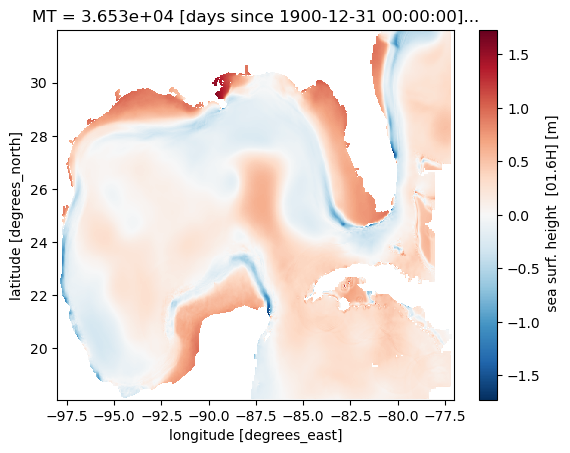

In [13]:
hycom_data.ssh.plot()

Note that xarray, like pandas, uses matplotlib for plotting, and that it figured out to use the blue to red colormap based on the type of data. Pretty cool. 

Let's plot some temperature data and see how it compares. Since temperature data is given for the whole depth, we have to select a level.

water_temp
(MT, Depth, Latitude, Longitude)

In [14]:
hycom_data_3D.water_temp[0,0,:,:]

<xarray.DataArray 'water_temp' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 3.653e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.3212209 27.482658 ]

In [ ]:
hycom_data_3D.water_temp[0,0,:,:].plot()

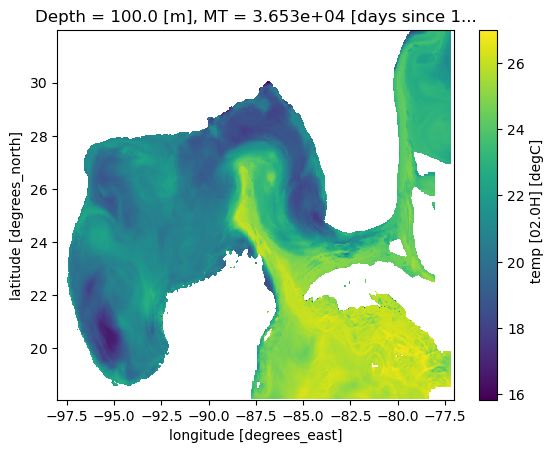

In [15]:
hycom_data_3D.water_temp[0,19,:,:].plot()

Those plots are really small. I like to change the default matplotlib preferences to make my plots bigger.

In [16]:
# change all the defaults (usually I stick this up with the import statements)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

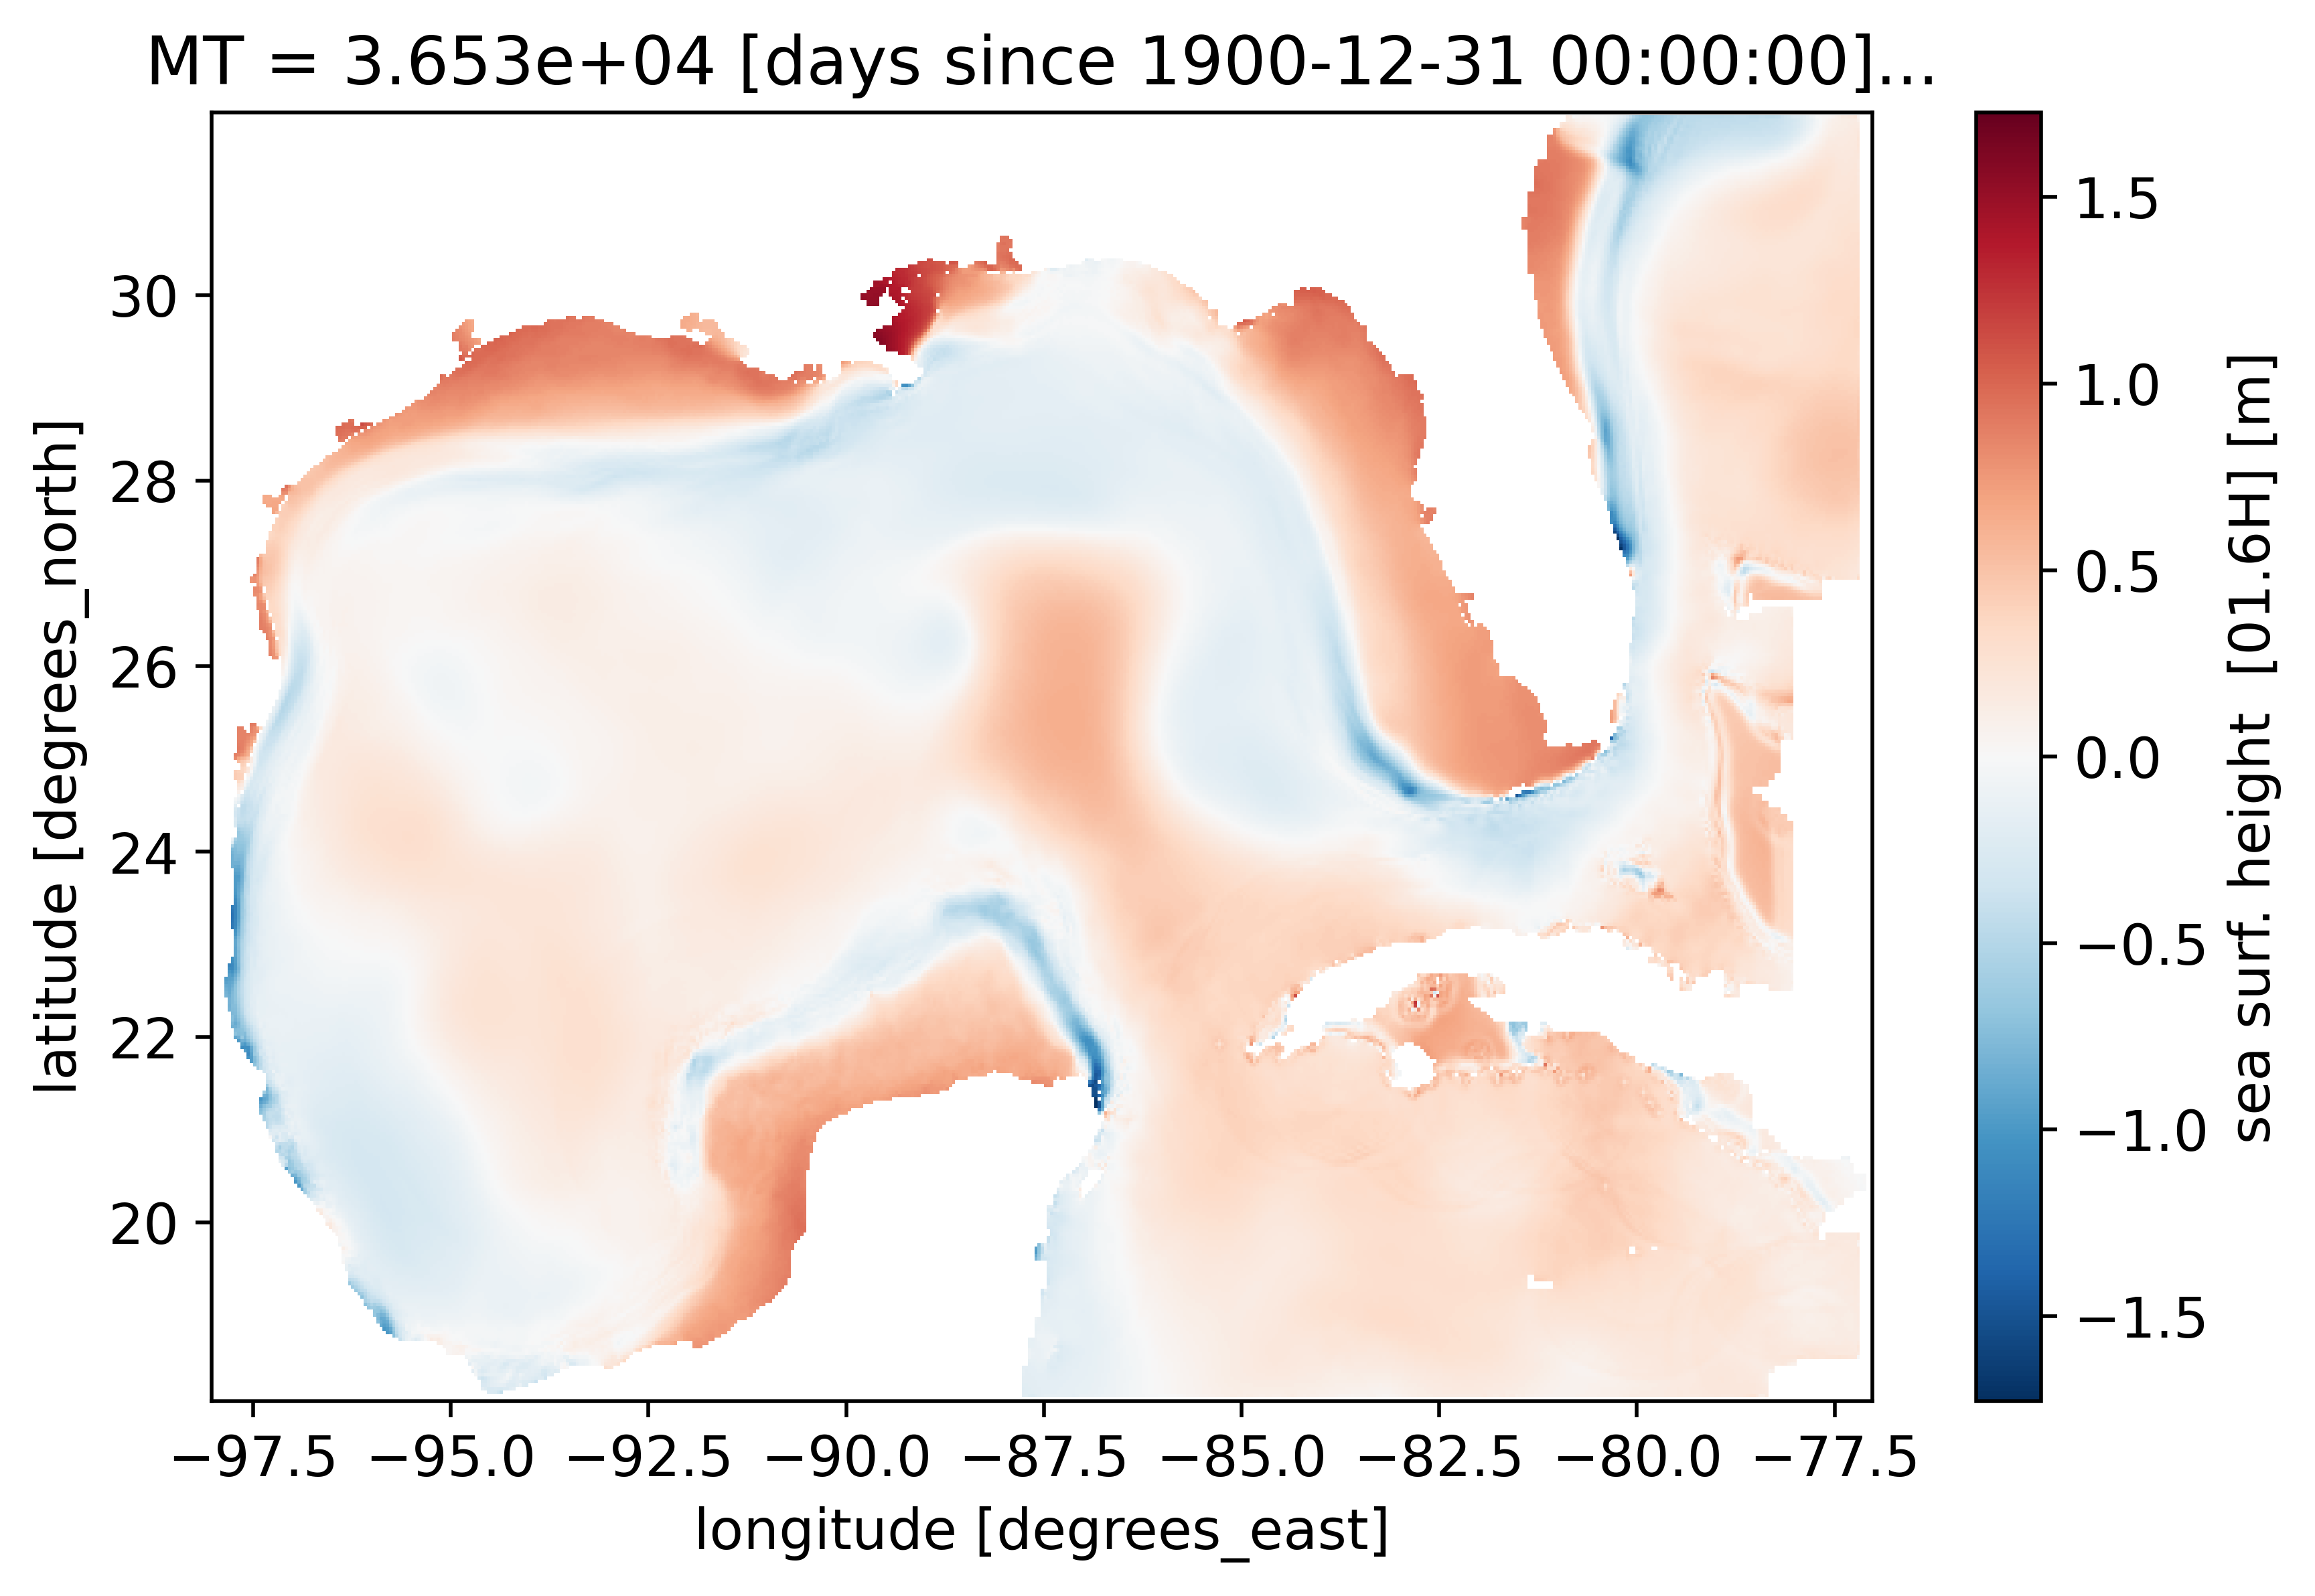

In [17]:
# now it's big and pretty.

hycom_data.ssh.plot()

Note if you know you are going to plot the same bit of data over and over again to fiddle with the plot, you can download the data you need and save it in an array to make the proccess faster.

In [18]:
SST = hycom_data_3D.water_temp[0,0,:,:]

In [19]:
type(SST)

xarray.core.dataarray.DataArray

In [20]:
SST # note it saves all the coordinates I need.

<xarray.DataArray 'water_temp' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 3.653e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.3212209 27.482658 ]

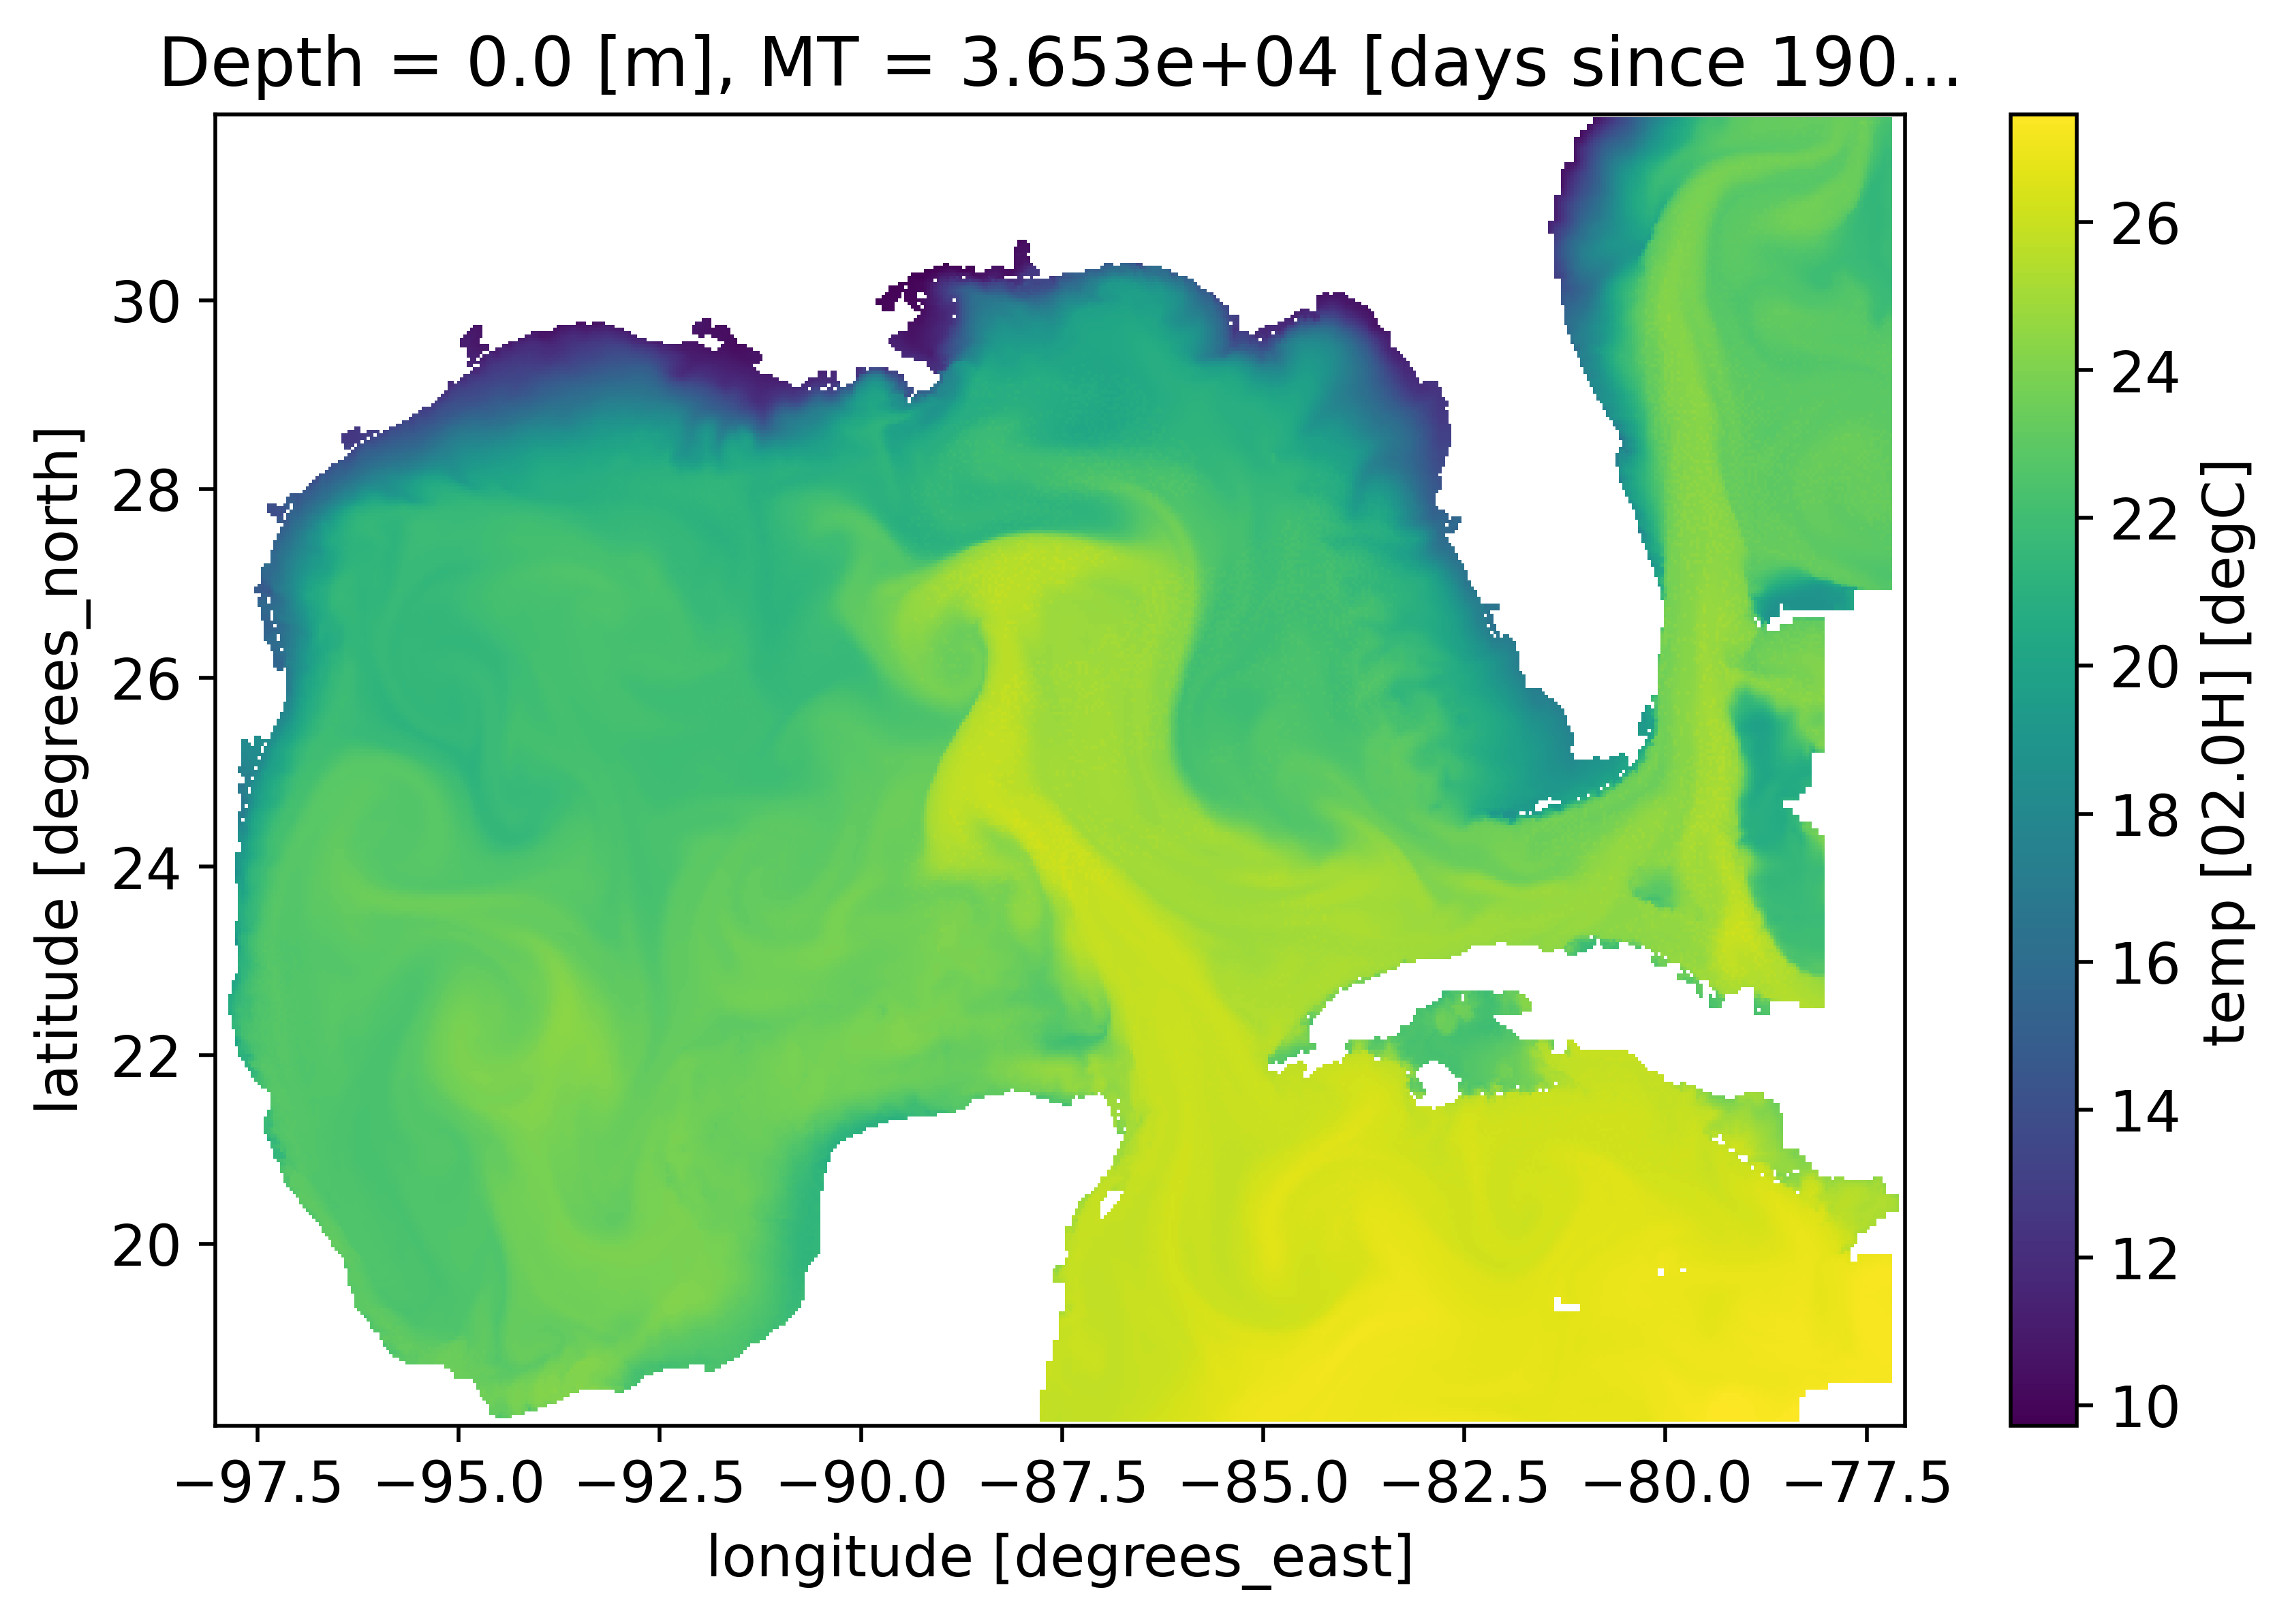

In [21]:
SST.plot()

I can also save this subset of the data to a new netcdf file locally very easily. See http://xarray.pydata.org/en/stable/io.html for more details.

In [22]:
SST.to_netcdf('SST_2001_001_01.nc')  # the new netcdf file is saved in the local directory

And then I load in the new netcdf file in the same way as I did the remote data, but using the local filepath

In [23]:
sst_data = xr.open_dataset('SST_2001_001_01.nc', decode_times=False)

In [24]:
sst_data

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth       float32 ...
    MT          float64 ...
    Date        float64 ...
Data variables:
    water_temp  (Latitude, Longitude) float32 ...

# Lab 6.1

**E.0** Finish Lab 5.2 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 1-2. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

See also http://xarray.pydata.org/en/stable/plotting.html for more info about plotting right from xarray (optional).

In [25]:
# Create a string: team
team = "teen titans"

# Define change_team()
def change_team():
    """Change the value of the global variable team."""

    # Use team in global scope
    global team

    # Change the value of team in global: team
    team = "justice league"
# Print team
print(team)

# Call change_team()
change_team()

# Print team
print(team)

teen titans
justice league


In [26]:
# Define three_shouts
def three_shouts(word1, word2, word3):
    """Returns a tuple of strings
    concatenated with '!!!'."""

    # Define inner
    def inner(word):
        """Returns a string concatenated with '!!!'."""
        return word + '!!!'

    # Return a tuple of strings
    return (inner(word1), inner(word2), inner(word3))

# Call three_shouts() and print
print(three_shouts('a', 'b', 'c'))

('a!!!', 'b!!!', 'c!!!')


In [27]:
# Define echo
def echo(n):
    """Return the inner_echo function."""

    # Define inner_echo
    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word

    # Return inner_echo
    return(inner_echo)

# Call echo: twice
twice = echo(2)

# Call echo: thrice
thrice = echo(3)

# Call twice() and thrice() then print
print(twice('hello'), thrice('hello'))

hellohello hellohellohello


In [28]:
# Define echo_shout()
def echo_shout(word):
    """Change the value of a nonlocal variable"""
    
    # Concatenate word with itself: echo_word
    echo_word = word * 2
    
    # Print echo_word
    print(echo_word)
    
    # Define inner function shout()
    def shout():
        """Alter a variable in the enclosing scope"""    
        # Use echo_word in nonlocal scope
        nonlocal echo_word
        
        # Change echo_word to echo_word concatenated with '!!!'
        echo_word = echo_word + '!!!'
    
    # Call function shout()
    shout()
    
    # Print echo_word
    print(echo_word)

# Call function echo_shout() with argument 'hello'
echo_shout('hello')

hellohello
hellohello!!!


In [29]:
# Define shout_echo
def shout_echo(word1, echo = 1):
    """Concatenate echo copies of word1 and three
     exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = echo * word1

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo() with "Hey": no_echo
no_echo = shout_echo("Hey")
# Call shout_echo() with "Hey" and echo=5: with_echo
with_echo = shout_echo("Hey", 5)

# Print no_echo and with_echo
print(no_echo)
print(with_echo)

Hey!!!
HeyHeyHeyHeyHey!!!


In [30]:
# Define shout_echo
def shout_echo(word1, echo = 1, intense = False):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Make echo_word uppercase if intense is True
    if intense is True:
        # Make uppercase and concatenate '!!!': echo_word_new
        echo_word_new = echo_word.upper() + '!!!'
    else:
        # Concatenate '!!!' to echo_word: echo_word_new
        echo_word_new = echo_word + '!!!'

    # Return echo_word_new
    return echo_word_new

# Call shout_echo() with "Hey", echo=5 and intense=True: with_big_echo
with_big_echo = shout_echo("Hey", echo = 5, intense = True)

# Call shout_echo() with "Hey" and intense=True: big_no_echo
big_no_echo = shout_echo("Hey", intense = True)

# Print values
print(with_big_echo)
print(big_no_echo)

HEYHEYHEYHEYHEY!!!
HEY!!!


In [31]:
# Define gibberish
def gibberish(*args):
    """Concatenate strings in *args together."""

    # Initialize an empty string: hodgepodge
    hodgepodge = ''

    # Concatenate the strings in args
    for word in args:
        hodgepodge += word

    # Return hodgepodge
    return(hodgepodge)

# Call gibberish() with one string: one_word
one_word = gibberish("luke")

# Call gibberish() with five strings: many_words
many_words = gibberish("luke", "leia", "han", "obi", "darth")

# Print one_word and many_words
print(one_word)
print(many_words)

luke
lukeleiahanobidarth


In [32]:
# Define report_status
def report_status(**kwargs):
    """Print out the status of a movie character."""

    print("\nBEGIN: REPORT\n")

    # Iterate over the key-value pairs of kwargs
    for key, value in kwargs.items():
        # Print out the keys and values, separated by a colon ':'
        print(key + ": " + value)

    print("\nEND REPORT")

# First call to report_status()
report_status(name="luke", affiliation="jedi", status="missing")

# Second call to report_status()
report_status(name="anakin", affiliation="sith lord", status="deceased")


BEGIN: REPORT

name: luke
affiliation: jedi
status: missing

END REPORT

BEGIN: REPORT

name: anakin
affiliation: sith lord
status: deceased

END REPORT


**E.3** Using the lecture as a guide, save the sea surface temperature at ~100 m depth on your birthday in 2019 as a new, local netcdf file. You don't have to submit the file, just the code here.

In [33]:
import xarray as xr
# make sure you also have nectdf4 installed!

In [34]:
# here I am going to grab the hindcast they made for Jan 1 2001. 
# Note I had to add the http: in front of the opendap link (see "open data here" button)

# download from the internet
link= "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/031_archv.2019_336_00_2d.nc"

# or download the file by clicking on the https server link and putting the correct path
file_path= r"C:\Users\anany\Downloads\1ST SEMESTER\OCS 4001 CHERYL HARRISON\LAB SUBMISSIONS\6.1\031_archv.2019_336_00_2d.nc"

In [35]:
hycom_data = xr.open_dataset(link, decode_times=False)

hycom_data2 = xr.open_dataset(file_path, decode_times=False)

# honestly I don't know why you need the decode_times bit with open_dataset
# I just know it doesn't work most of the time if you leave it out (bonus token for anyone who figures it out!)

In [36]:
hycom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
  * MT                     (MT) float64 4.344e+04
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM
    source:                          HYCOM archive file
    experiment:                      01.0
    comment:                         p-grid
    history:                         Mon Jul 18 16:36:33 2022: ncks -x -v sur...
    history_of_appended_files:       Mon Jul 18 16:36:33 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

In [37]:
hycom_data.ssh

<xarray.DataArray 'ssh' (MT: 1, Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
    Date       (MT) float64 ...
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * MT         (MT) float64 4.344e+04
Attributes:
    standard_name:  sea_surface_elevation
    units:          m
    valid_range:    [-1.5192732   0.50972646]
    long_name:       sea surf. height  [01.0H]
    _ChunkSizes:    [  1 385 525]

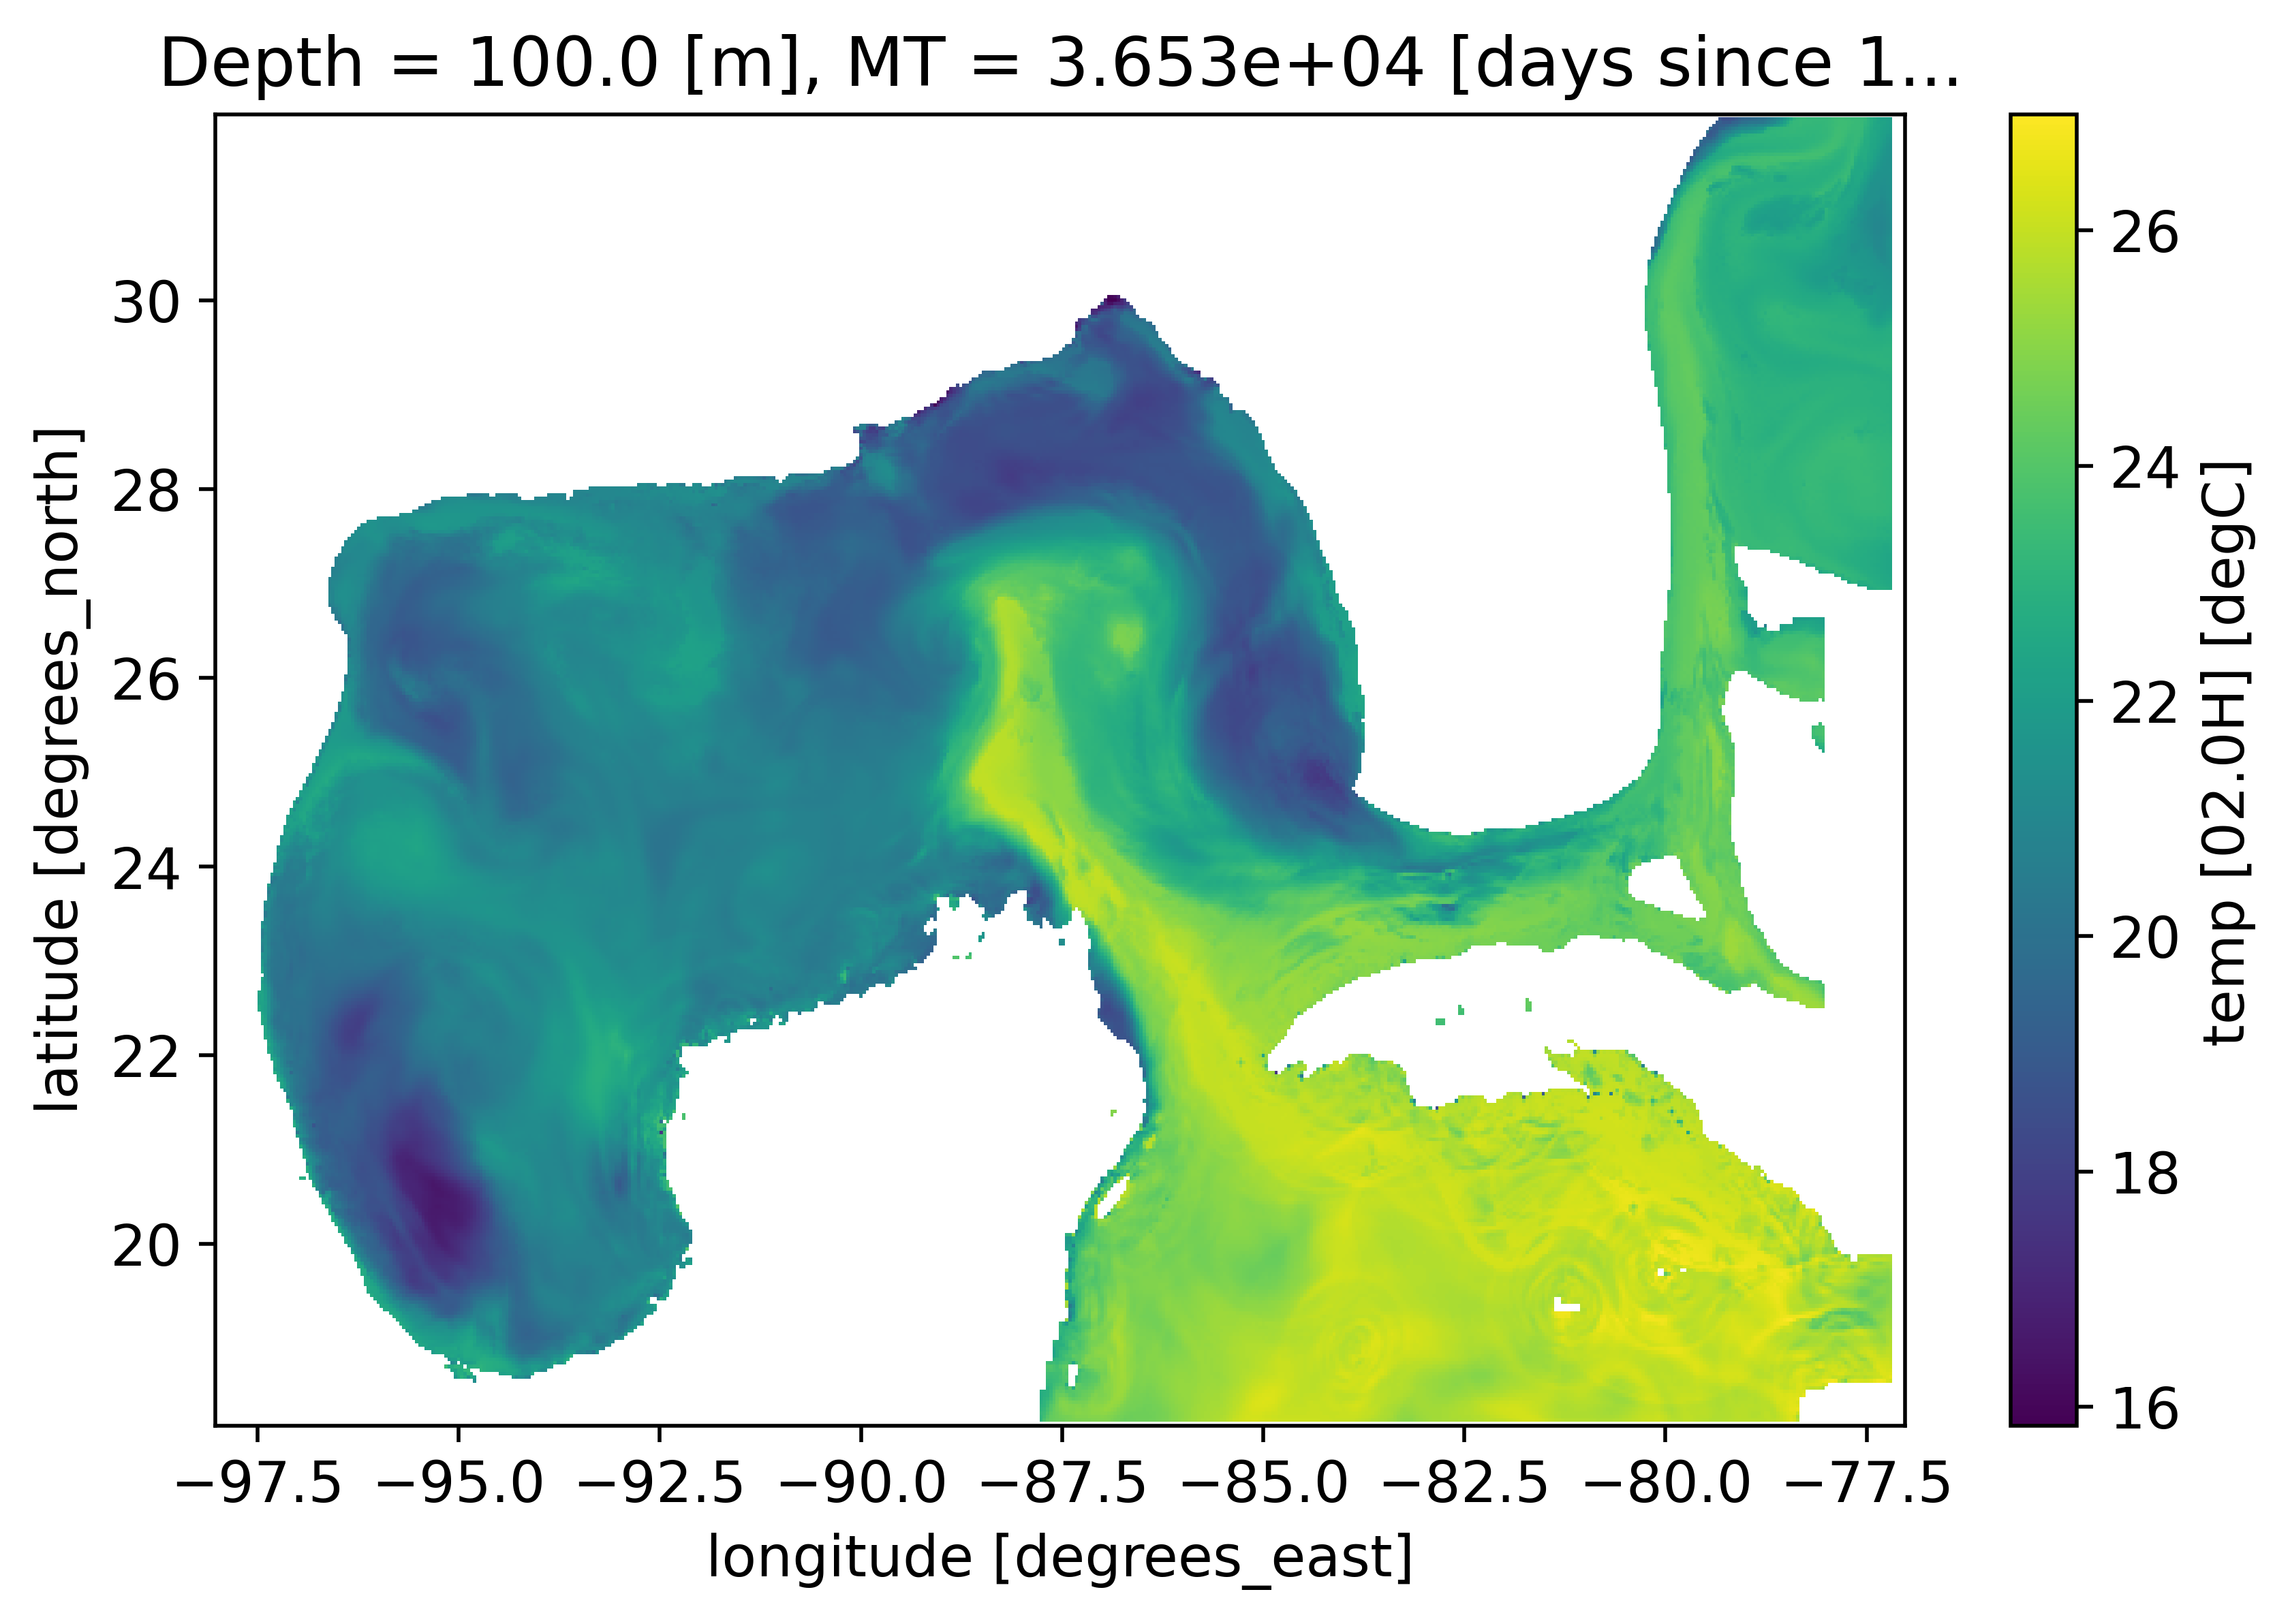

In [38]:
hycom_data_3D.water_temp[0,19,:,:].plot()

<xarray.Dataset>
Dimensions:     (Longitude: 2101, Latitude: 1537, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.99 -97.98 ... -77.02 -77.01 -77.0
  * Latitude    (Latitude) float32 18.09 18.1 18.11 18.12 ... 31.94 31.95 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 4.344e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dime

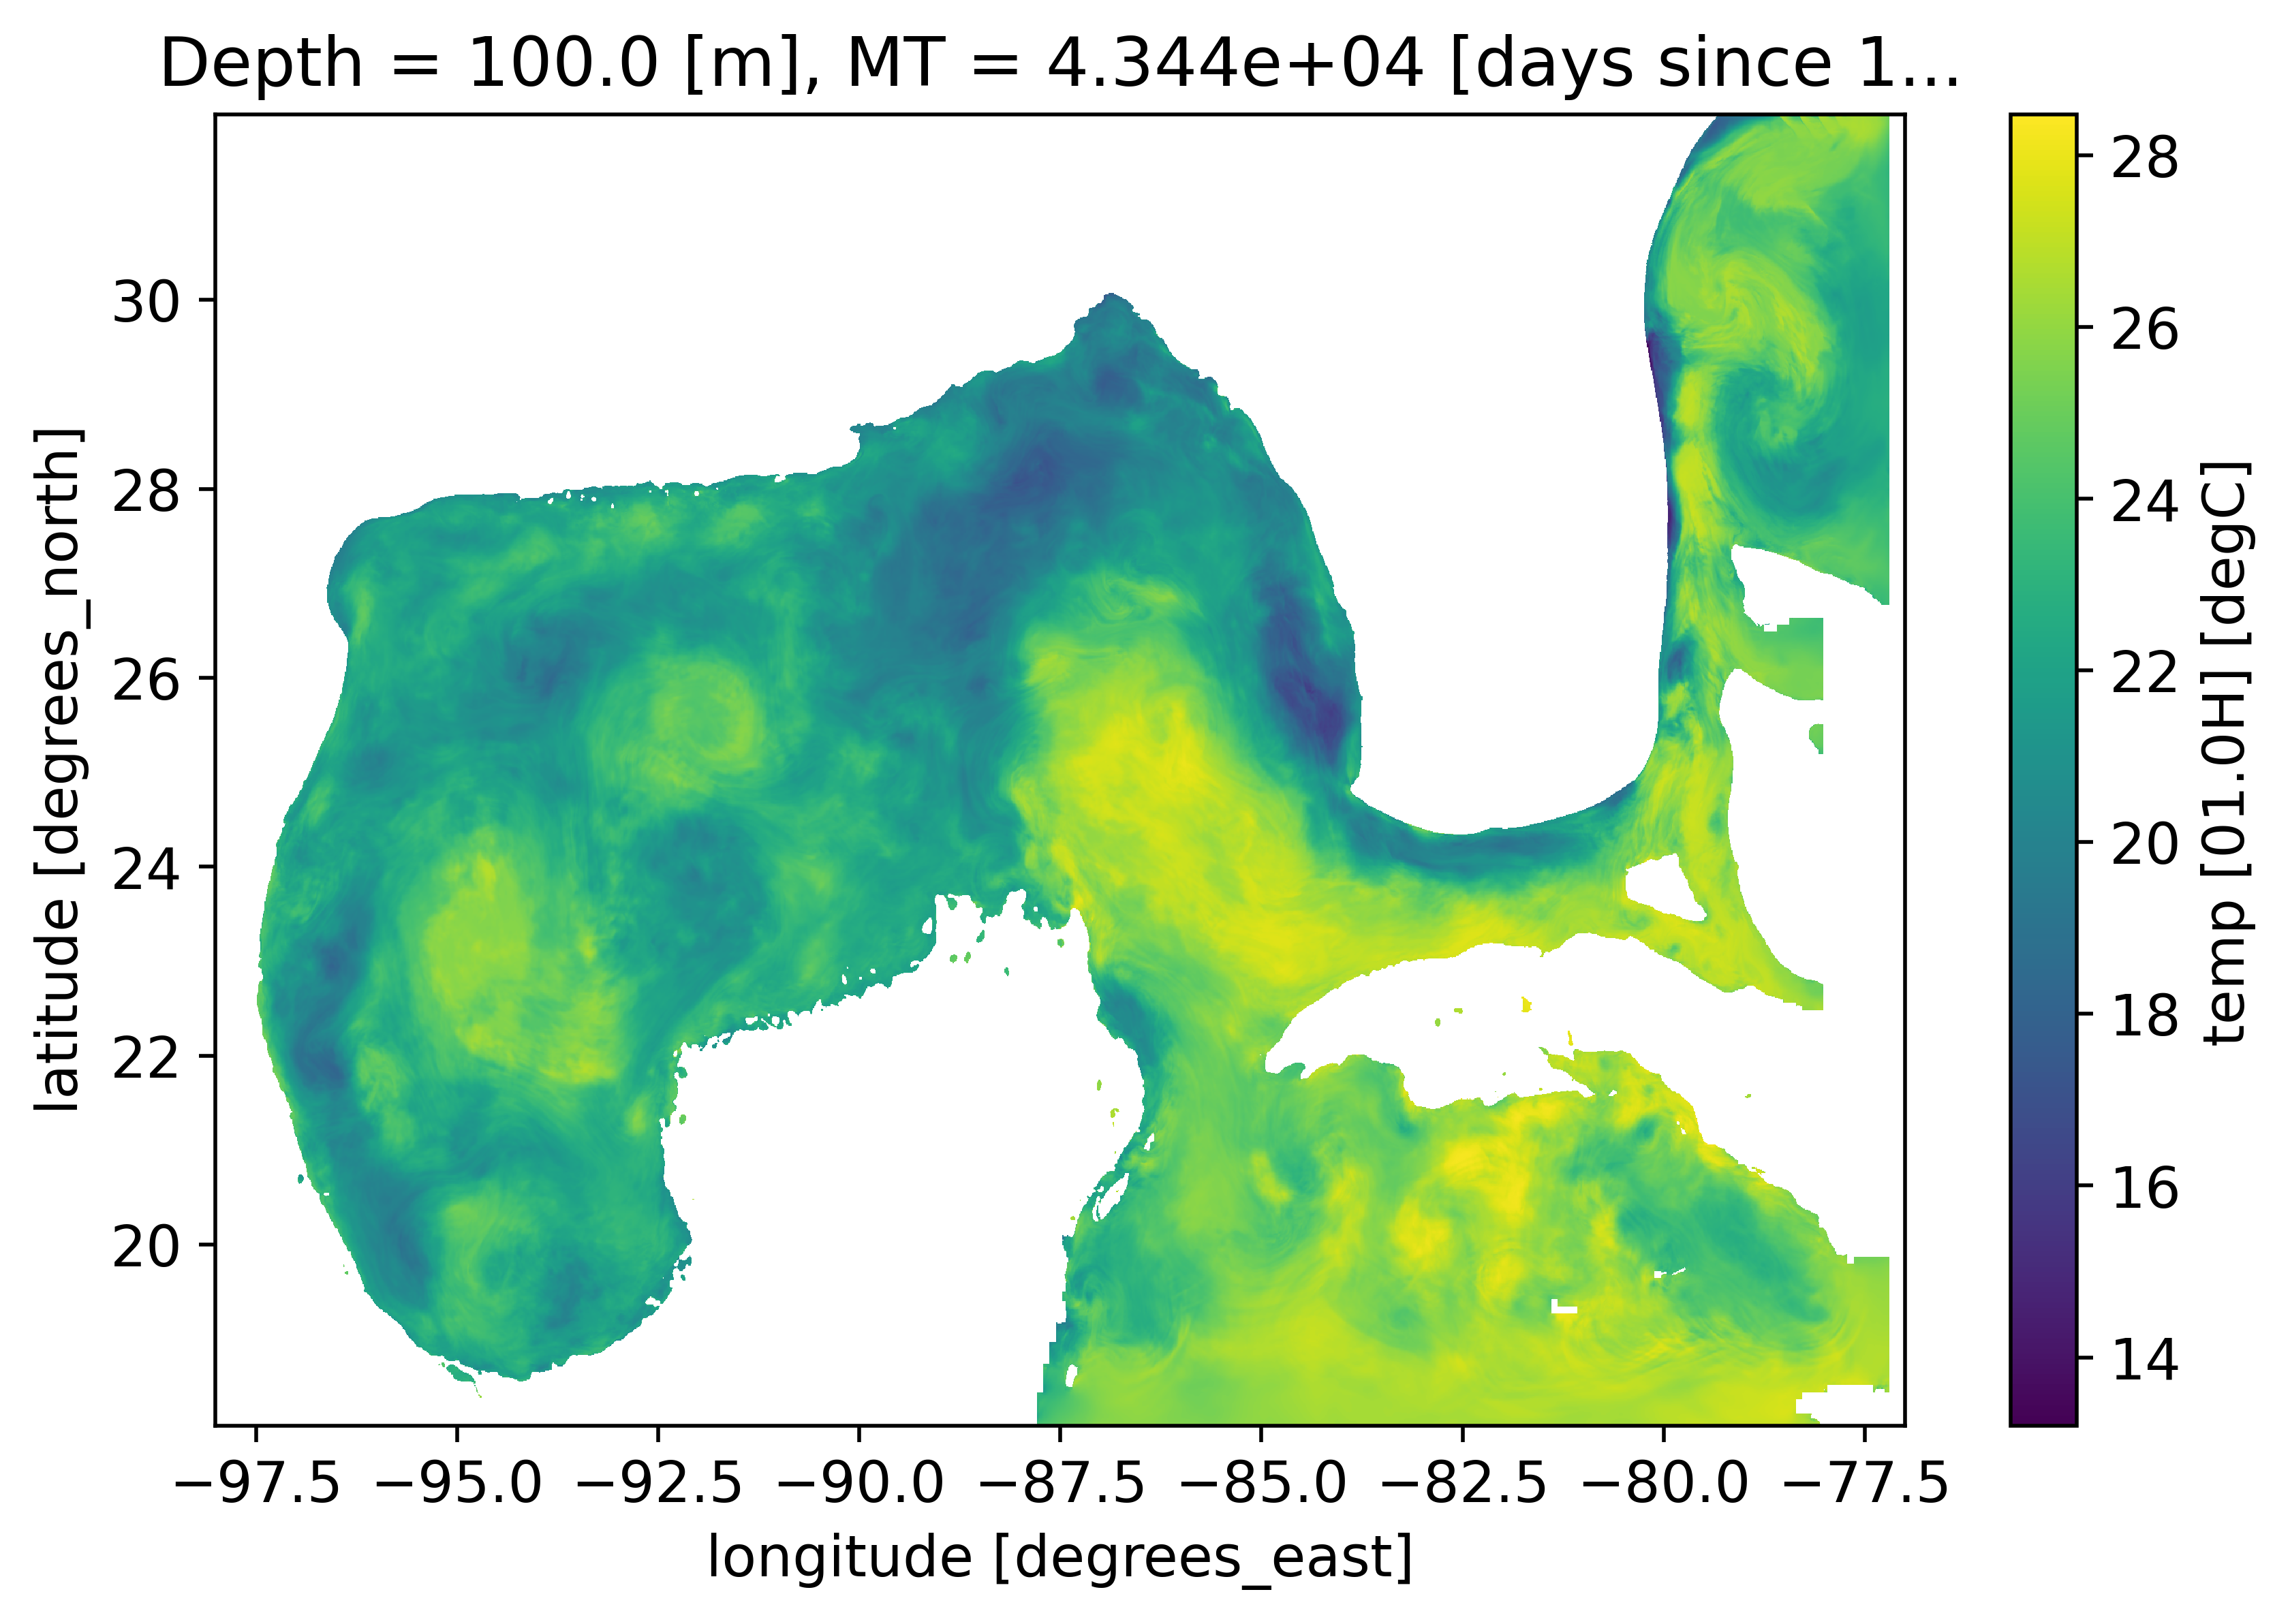

In [39]:
import xarray as xr

hycom_data_dec01 = xr.open_dataset('https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.01/reanalysis/data/2019/023_archv.2019_336_05_3z.nc', decode_times=False)
print(hycom_data_dec01)
SST = hycom_data_dec01['water_temp'][0, 19, :, :]

# Plot the sea surface temperature
SST.plot()
SST.to_netcdf('birthday_GOM_SST_dec01.nc')

**E.4** Plot the above (your 2019 birthday SST) using the basic xarray funcitons

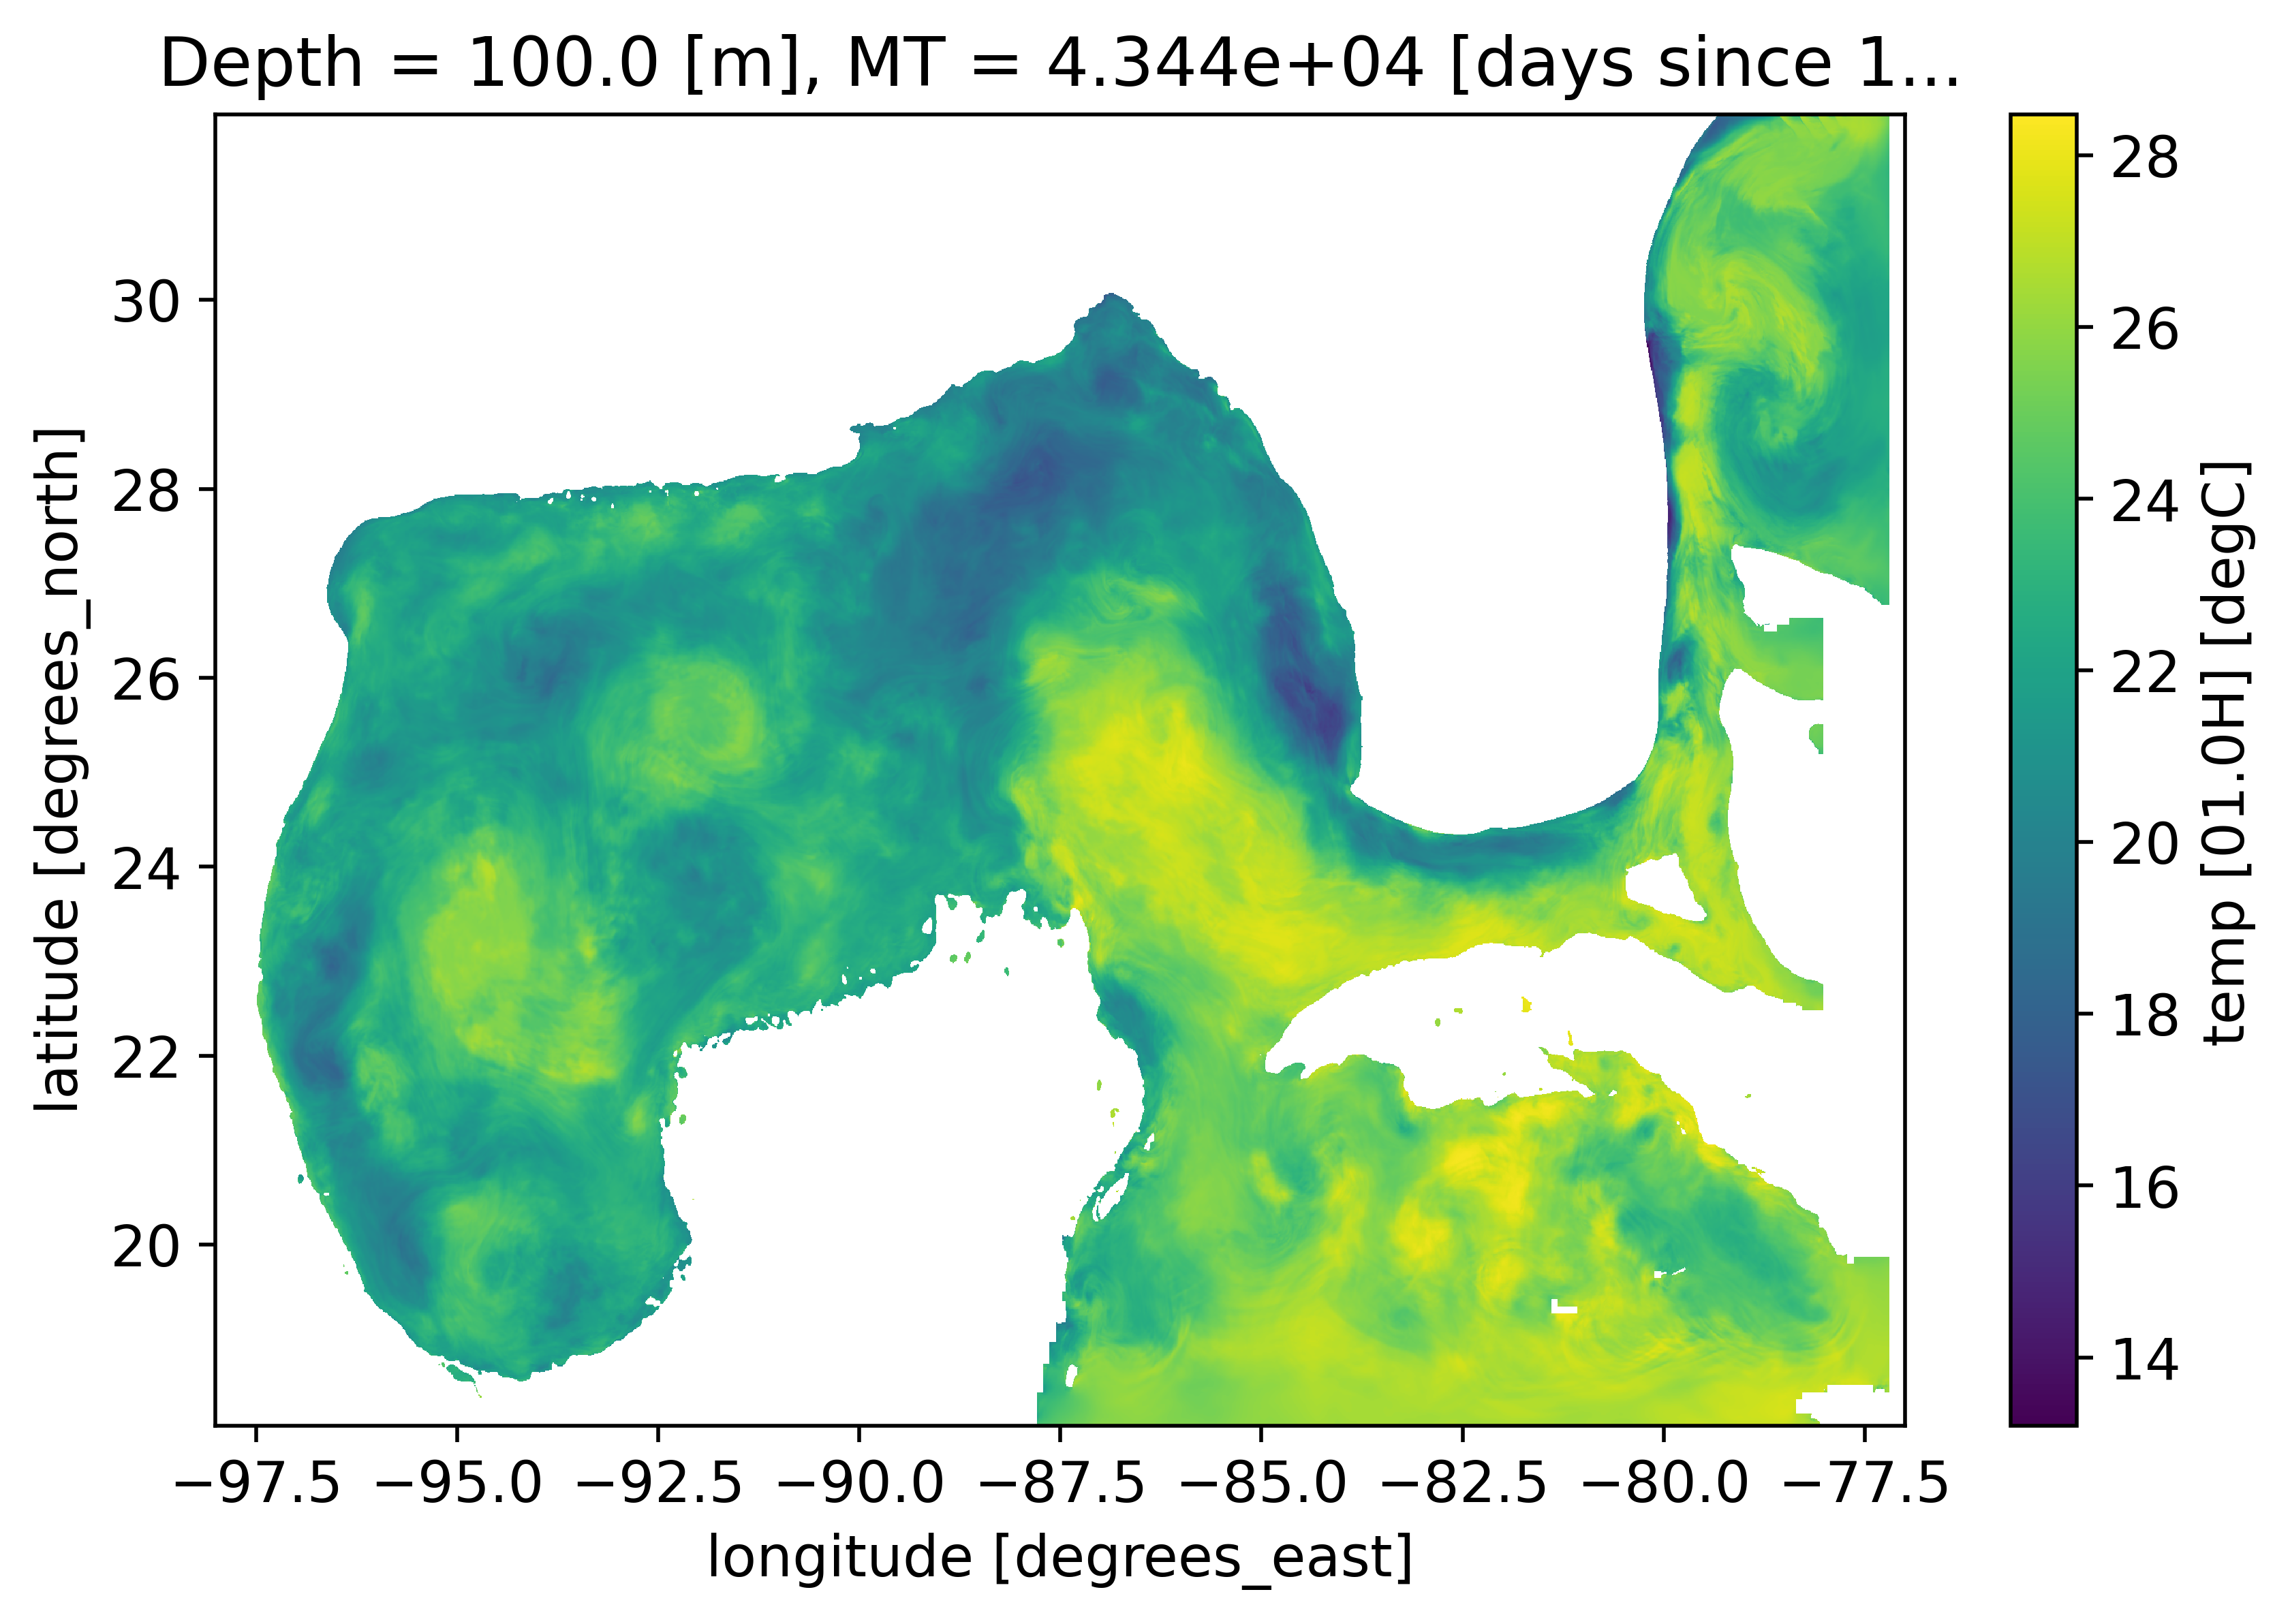

In [41]:
SST = hycom_data_dec01['water_temp'][0, 19, :, :].plot()

**E.5** What is the SST for flower garden banks national marine sanctuary o

In [47]:
#for surface level filter the data
SST1 = hycom_data_dec01.water_temp[0,0,:,:] 

In [48]:
SST1['Latitude']

<xarray.DataArray 'Latitude' (Latitude: 1537)>
array([18.091648, 18.101154, 18.110659, ..., 31.943678, 31.952162, 31.960648],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 18.09 18.1 18.11 18.12 ... 31.94 31.95 31.96
    Depth     float32 0.0
    MT        float64 4.344e+04
    Date      float64 ...
Attributes:
    standard_name:  latitude
    axis:           Y
    units:          degrees_north

In [49]:
SST1['Longitude']

<xarray.DataArray 'Longitude' (Longitude: 2101)>
array([-98.  , -97.99, -97.98, ..., -77.02, -77.01, -77.  ], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.99 -97.98 ... -77.02 -77.01 -77.0
    Depth      float32 0.0
    MT         float64 4.344e+04
    Date       float64 ...
Attributes:
    standard_name:  longitude
    axis:           X
    point_spacing:  even
    units:          degrees_east

In [52]:
# Randomly selected one lat long for sst 0 in flower garden banks
lat = 27.87
long = -93.6

# Filtering the array and extracting the index of the flower garden lat long
lat_indice = [index for index, value in enumerate(SST1['Latitude'].values) if value > 27.8 and value <27.9]
print(lat_indice)

long_indice = [index for index, value in enumerate(SST1['Longitude'].values) if value > -93.7 and value < -93.5]
print(long_indice)

[1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067]
[430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449]


In [51]:
SST2 = hycom_data_dec01.water_temp[0,0,1059,439] 
SST2.values

array(24.160942, dtype=float32)

24.16 is the expected temperature